## Naive Bayes
- 数据集

$$sklearn.datasets.load\_digits$$

- 输出

$$H=I_N-\frac{1}{n}I_nI_N^T$$
$$S=X^THHX,G^TSG^T=L$$
$$Y=HXG_k$$
$$B=HXX^TH,eig\_vec(B)=HXG=Y$$

In [1]:
import math
import warnings
import numpy as np
import pandas as pd
from numpy import linalg as LA
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [2]:
X,Y=load_digits(return_X_y=True)

(<matplotlib.image.AxesImage at 0x242fa04eb38>, 0)

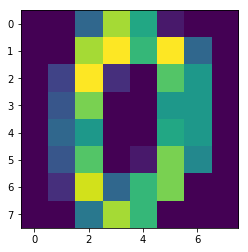

In [3]:
plt.imshow(X[0].reshape(8,8)),Y[0]

In [4]:
class PCA():
    def __init__(self,n_sample,q):
        self.q=q
        self.one=np.ones(n_sample).reshape(-1,1)
        self.H=np.diag(np.ones(n_sample))-(1/n_sample)*np.dot(self.one,self.one.T)
        
    def fit(self,X):
        B=np.dot(np.dot(np.dot(self.H,X),X.T),self.H)
        eig_val,eig_vec=LA.eig(B)
        u=np.argsort(eig_val)[::-1]
        eig_val=eig_val[u]
        eig_vec=eig_vec[:,u]
#         tmp=LA.norm(eig_vec,axis=0)
#         eig_vec=eig_vec/tmp
#         eig_vec=eig_vec/np.sqrt(eig_val)
        return eig_vec[:,:self.q]

In [5]:
q,n_sample=2,X.shape[0]
pre=PCA(n_sample,q)
pre_x=pre.fit(X)

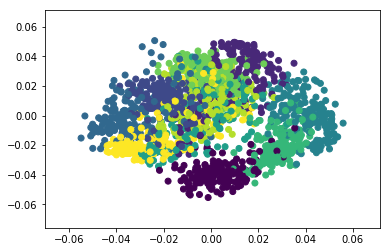

In [6]:
plt.scatter(pre_x[:,0],pre_x[:,1],c=Y)

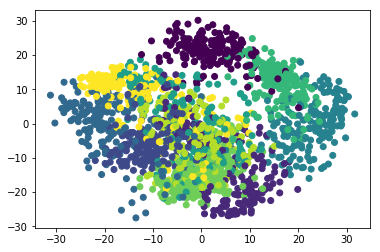

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)  
y=pca.transform(X)
plt.scatter(y[:,0],y[:,1],c=Y)